In [1]:
import tfci
from PIL import Image 
from IPython.display import display
import gen_sizes
import pandas as pd
import time

In [2]:
models = ['hific-lo', 'hific-mi', 'hific-hi', 'mbt2018-mean-mse-1', 'mbt2018-mean-mse-2', 'mbt2018-mean-mse-3', 'mbt2018-mean-mse-4', 'mbt2018-mean-mse-5', 'mbt2018-mean-mse-6', 'mbt2018-mean-mse-7', 'mbt2018-mean-mse-8', 'mbt2018-mean-msssim-1', 'mbt2018-mean-msssim-2', 'mbt2018-mean-msssim-3', 'mbt2018-mean-msssim-4', 'mbt2018-mean-msssim-5', 'mbt2018-mean-msssim-6', 'mbt2018-mean-msssim-7', 'mbt2018-mean-msssim-8', 'bmshj2018-factorized-mse-1', 'bmshj2018-factorized-mse-2', 'bmshj2018-factorized-mse-3', 'bmshj2018-factorized-mse-4', 'bmshj2018-factorized-mse-5', 'bmshj2018-factorized-mse-6', 'bmshj2018-factorized-mse-7', 'bmshj2018-factorized-mse-8', 'bmshj2018-factorized-msssim-1', 'bmshj2018-factorized-msssim-2', 'bmshj2018-factorized-msssim-3', 'bmshj2018-factorized-msssim-4', 'bmshj2018-factorized-msssim-5', 'bmshj2018-factorized-msssim-6', 'bmshj2018-factorized-msssim-7', 'bmshj2018-factorized-msssim-8', 'bmshj2018-hyperprior-mse-1', 'bmshj2018-hyperprior-mse-2', 'bmshj2018-hyperprior-mse-3', 'bmshj2018-hyperprior-mse-4', 'bmshj2018-hyperprior-mse-5', 'bmshj2018-hyperprior-mse-6', 'bmshj2018-hyperprior-mse-7', 'bmshj2018-hyperprior-mse-8', 'bmshj2018-hyperprior-msssim-1', 'bmshj2018-hyperprior-msssim-2', 'bmshj2018-hyperprior-msssim-3', 'bmshj2018-hyperprior-msssim-4', 'bmshj2018-hyperprior-msssim-5', 'bmshj2018-hyperprior-msssim-6', 'bmshj2018-hyperprior-msssim-7', 'bmshj2018-hyperprior-msssim-8', 'b2018-leaky_relu-128-1', 'b2018-leaky_relu-128-2', 'b2018-leaky_relu-128-3', 'b2018-leaky_relu-128-4', 'b2018-leaky_relu-192-1', 'b2018-leaky_relu-192-2', 'b2018-leaky_relu-192-3', 'b2018-leaky_relu-192-4', 'b2018-gdn-128-1', 'b2018-gdn-128-2', 'b2018-gdn-128-3', 'b2018-gdn-128-4', 'b2018-gdn-192-1', 'b2018-gdn-192-2', 'b2018-gdn-192-3', 'b2018-gdn-192-4']
tfci.list_models()

The following models are available:

* Models published in:
  F. Mentzer, G. Toderici, M. Tschannen, E. Agustsson:
  "High-Fidelity Generative Image Compression"
  Adv. in Neural Information Processing Systems 33 (NeurIPS 2020)

  hific-lo
  hific-mi
  hific-hi

  These are the GAN-based models that were used for the paper and the demo
  website (https://hific.github.io/). The target bitrates of these models are
  0.14 bpp for "lo", 0.3 bpp for "mi", and 0.45 bpp for "hi".

* Models published in:
  D. Minnen, J. Ballé, G.D. Toderici:
  "Joint Autoregressive and Hierarchical Priors for Learned Image Compression"
  Adv. in Neural Information Processing Systems 31 (NeurIPS 2018)

  mbt2018-mean-mse-[1-8]
  mbt2018-mean-msssim-[1-8]

  These are hyperprior models with non zero-mean Gaussian conditionals (without
  autoregression), optimized for MSE (mean squared error) and MS-SSIM
  (multiscale SSIM), respectively. The number 1-8 at the end indicates the
  quality level (1: lowest, 8: high

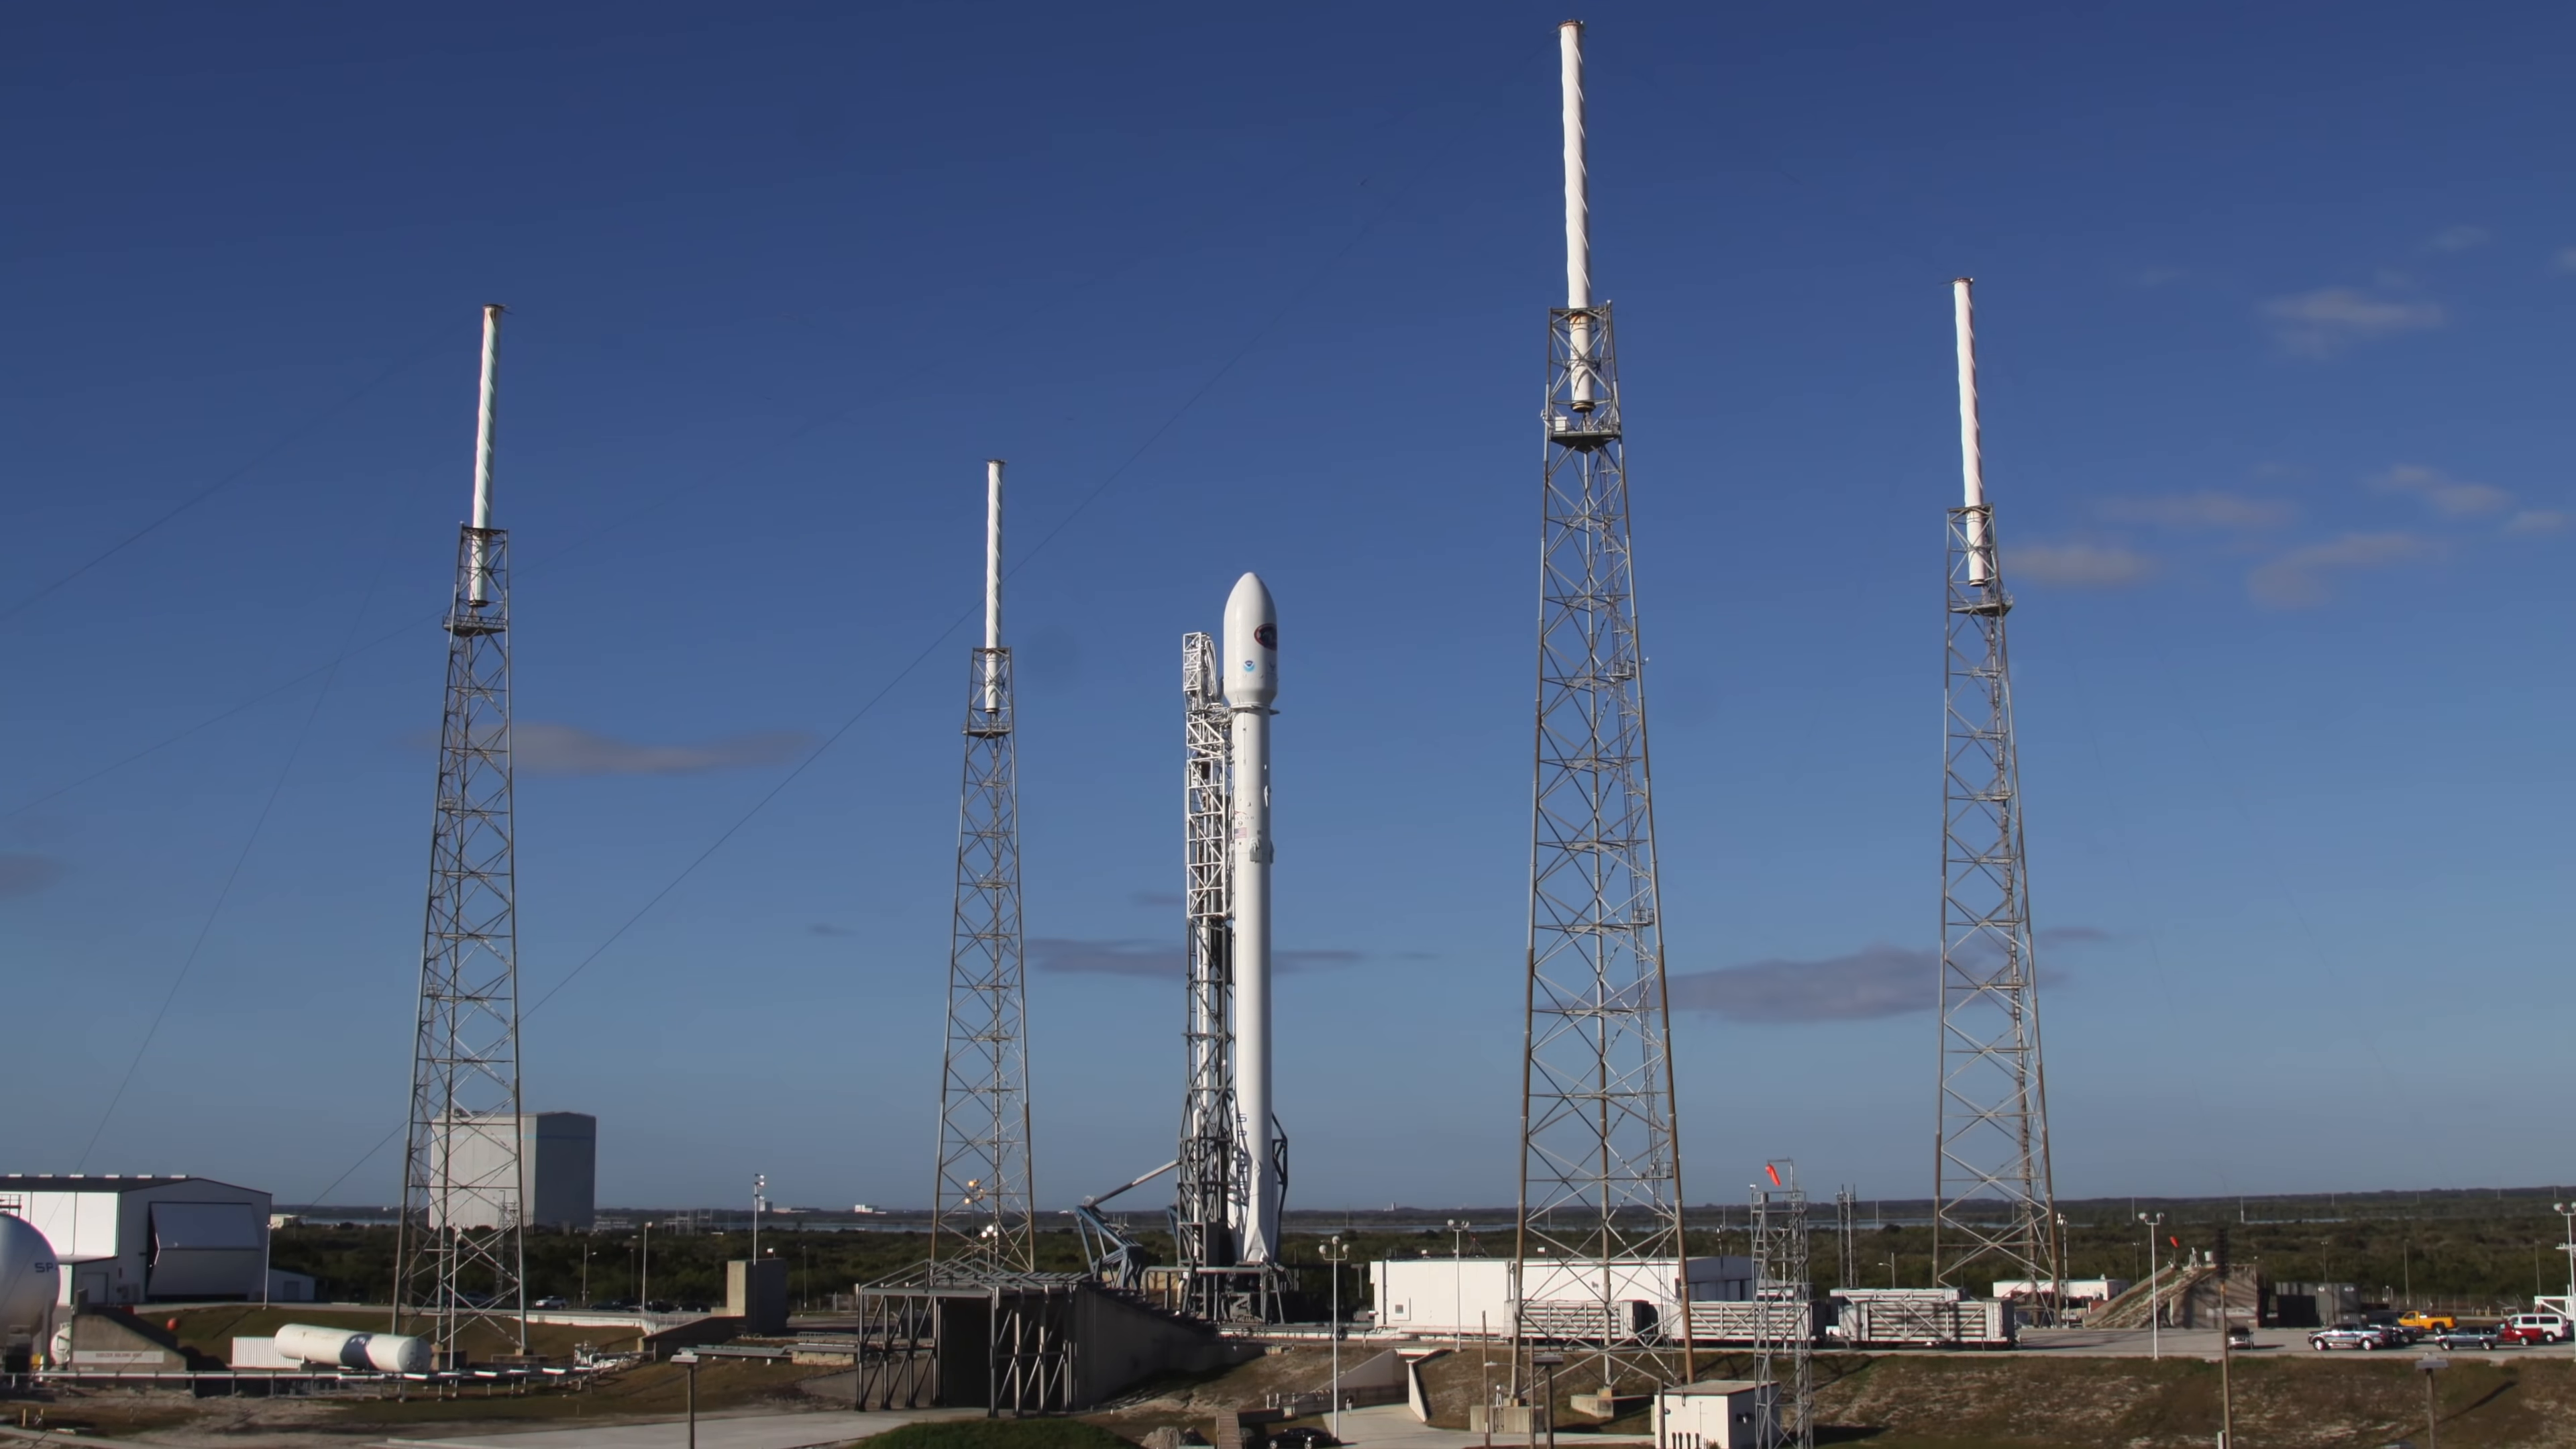

In [3]:
imo = Image.open('images/ori.png')
width, height = imo.size
display(imo)

In [4]:
sizes = gen_sizes.generate_videos(width, height, [(16,9)], 1000000000000, 30000, 2)

In [15]:
columns = ['Size', 'Model', 'Compress Success', 'Time to Compress', 'Decompress Success', 'Time to Decompress']
df = pd.DataFrame(columns=columns)

,0,1,2,3,4,5,Compress Success,Decompress Success,Model,Size,Time to Compress,Time to Decompress
0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for i in reversed(sizes['16:9']):
    s = i[1]
    if i[1] != 2160:
        left = width - i[0]
        top = height - i[1]
        right = width
        bottom = height
        im = imo.crop((left, top, right, bottom))
        impath = 'images/' + str(i[1]) + '.png'
        im.save(impath)
    else:
        impath = 'images/' + str(i[1]) + '.png'
        imo.save(impath)

    for model in models:
        m = model
        c = 'N'
        d = 'N'
        cpath = "compressed/" + model + '_' + str(i[1]) + '.tfci'
        dpath = "decompressed/" + model + '_' + str(i[1]) + '.png'
        tfci.compress(model, impath, cpath)
        # try:
        #     t0 = time.time()
        #     tfci.compress(model, impath, cpath)
        #     t1 = time.time()
        #     c = 'Y'
        # except:
        #     print(':(')
        # try:
        #     t2 = time.time()
        #     tfci.decompress(cpath, dpath)
        #     t3 = time.time()
        #     d = 'Y'
        # except:
        #     print(':(')
        # df.append([s, m, c, t1-t0, d, t3-t2])
        # df.to_csv('results.csv')
    



INFO:tensorflow:Saver not created because there are no variables in the graph to restore


KeyboardInterrupt: 